<a href="https://colab.research.google.com/github/farisnanosoft/Lip-Reading-CNN/blob/main/lip_p_w_vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [ ]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [ ]:
import os
os.chdir("drive/")
!ls

ADFWeek1_Participant.zip  Personal
Colab Notebooks		  PRO
drive			  __pycache__
lip_dataset.h5		  resnets_utils (1736a74d).py
lip_dataset_p_w.h5	  resnets_utils.py
lip_p_w_vgg16.ipynb	  SAMSUNG_MEMO
lip_res50.ipynb		  test3.jpg
model_celeb_vgg16.h5	  this_message_in_html.htm.odt
model_lip.h5		  train_lip.h5
model_lip_vgg16.h5


In [ ]:
import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Dropout, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
#import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from resnets_utils import *
from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline

import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)
K.clear_session()

Using TensorFlow backend.


In [ ]:
!pip install keras_vggface

In [ ]:
import numpy as np
from keras_vggface import VGGFace
from keras.preprocessing import image
from keras_vggface import utils
import keras
import unittest

In [ ]:
keras.backend.set_image_dim_ordering('tf')
model = VGGFace(model='vgg16')
model.save('model_celeb_vgg16.h5')

In [ ]:
img = image.load_img('test3.jpg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = utils.preprocess_input(x, version=1)
preds = model.predict(x)
#print ('\n', "VGG16")
#print('\n',preds)
print('\n','Predicted:', utils.decode_predictions(preds))

In [ ]:
model = load_model('model_celeb_vgg16.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_1 (Conv2D)             (None, 224, 224, 64)      1792      
_________________________________________________________________
conv1_2 (Conv2D)             (None, 224, 224, 64)      36928     
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 112, 112, 64)      0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2_2 (Conv2D)             (None, 112, 112, 128)     147584    
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 56, 56, 128)       0         
__________

/usr/local/lib/python3.6/dist-packages/keras/models.py:282: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [ ]:
with h5py.File("lip_dataset_p_w.h5", "r") as hf:
    X_train_orig, Y_train_orig, X_test_orig, Y_test_orig=hf["train_orig_x"][:],hf["train_orig_y"][:],hf["valid_orig_x"][:],hf["valid_orig_y"][:]

In [ ]:
#imshow(X_train_orig[0])
# Normalize image vectors
X_train,X_test=[],[]
X_train = X_train_orig/255.
X_test = X_test_orig/255.

Y_train_orig=Y_train_orig-1
Y_test_orig=Y_test_orig-1
# Convert training and test labels to one hot matrices
Y_train = convert_to_one_hot(Y_train_orig, 20).T
Y_test = convert_to_one_hot(Y_test_orig, 20).T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))


number of training examples = 2335
number of test examples = 200
X_train shape: (2335, 224, 224, 3)
Y_train shape: (2335, 20)
X_test shape: (200, 224, 224, 3)
Y_test shape: (200, 20)


In [ ]:
Y_train[50]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0.])

In [ ]:
# use transfer learning for re-training the last layers
# Freeze first 25 layers, so that we can retrain 26th and so on using our classes.
#for layer in model.layers[:-5]:
#   layer.trainable = False

for layer in model.layers:
    layer.trainable = False
#seed=0
# Adding our new layers
#top_layers = model.output
top_layers = model.get_layer('flatten').output
#top_layers = Flatten(input_shape=model.output_shape[1:])(top_layers)
#top_layers = Flatten(name='flatten_a')(top_layers)
#top_layers = Dense(10, activation="relu",input_shape=(10,))(top_layers)
#top_layers = Dropout(0.5)(top_layers)
#top_layers = Dense(512, activation="relu")(top_layers)
top_layers = Dense(64, activation="relu",name='output_layer_a')(top_layers)
#top_layers = Dropout(0.5)(top_layers)
top_layers = Dense(20, activation="softmax",name='output_layer_b')(top_layers)

# Add top layers on top of freezed (not re-trained) layers of VGG16
model_final = Model(input = model.input, output = top_layers)

# Compile the model
#model_final.compile(loss = "binary_crossentropy", optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])
model_final.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Initialize test and training data
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
datagen.fit(X_train)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("ou...)`


In [ ]:
model_final.fit(X_train, Y_train, shuffle=True, epochs = 10, batch_size = 64)

Epoch 1/10
2335/2335 [==============================] - 23s 10ms/step - loss: 0.1537 - acc: 0.9966
Epoch 2/10
2335/2335 [==============================] - 23s 10ms/step - loss: 0.1391 - acc: 0.9974
Epoch 3/10
2335/2335 [==============================] - 22s 10ms/step - loss: 0.1249 - acc: 0.9979
Epoch 4/10
2335/2335 [==============================] - 23s 10ms/step - loss: 0.1136 - acc: 0.9991
Epoch 5/10
2335/2335 [==============================] - 22s 10ms/step - loss: 0.1023 - acc: 0.9996
Epoch 6/10
2335/2335 [==============================] - 23s 10ms/step - loss: 0.0936 - acc: 0.9991
Epoch 7/10
2048/2335 [=========================>....] - ETA: 2s - loss: 0.0866 - acc: 0.9995

2335/2335 [==============================] - 22s 10ms/step - loss: 0.0863 - acc: 0.9996
Epoch 8/10
2335/2335 [==============================] - 22s 10ms/step - loss: 0.0788 - acc: 0.9996
Epoch 9/10
2335/2335 [==============================] - 22s 10ms/step - loss: 0.0719 - acc: 1.0000
Epoch 10/10
2335/2335 [==============================] - 22s 10ms/step - loss: 0.0661 - acc: 0.9996


In [ ]:
model_final.fit_generator(datagen.flow(X_train, Y_train, batch_size=75),shuffle=True,
                    steps_per_epoch=len(X_train) / 32, epochs=3)

Epoch 1/3
37/36 [==============================] - 43s 1s/step - loss: 3.0873 - acc: 0.4502
Epoch 2/3
37/36 [==============================] - 44s 1s/step - loss: 1.7324 - acc: 0.5224
Epoch 3/3
37/36 [==============================] - 43s 1s/step - loss: 1.4349 - acc: 0.5669


In [ ]:
model_final=load_model('model_lip_vgg16.h5')

In [ ]:
preds = model_final.evaluate(X_test, Y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

200/200 [==============================] - 2s 10ms/step
Loss = 2.5560735702514648
Test Accuracy = 0.32


In [ ]:
model_final.save('model_lip_p_w_vgg16.h5')

In [ ]:
model_final.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_1 (Conv2D)             (None, 224, 224, 64)      1792      
_________________________________________________________________
conv1_2 (Conv2D)             (None, 224, 224, 64)      36928     
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 112, 112, 64)      0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2_2 (Conv2D)             (None, 112, 112, 128)     147584    
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 56, 56, 128)       0         
__________

In [ ]:
#imshow(X_test[0])
x_e=np.expand_dims(X_test[53], axis=0)
print(model_final.predict(x_e),np.argmax(model_final.predict(x_e))+1,np.argmax(Y_test[53])+1)

[[0.02896376 0.06358255 0.05546102 0.21203507 0.08605727 0.14556655
  0.11297292 0.13156238 0.12667178 0.03712667]] 4 6


In [ ]:
y_pred_test = model_final.predict(X_test)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

In [ ]:
Y_test_orig[1:10].T

array([9, 9, 9, 9, 9, 9, 9, 9, 9], dtype=int32)

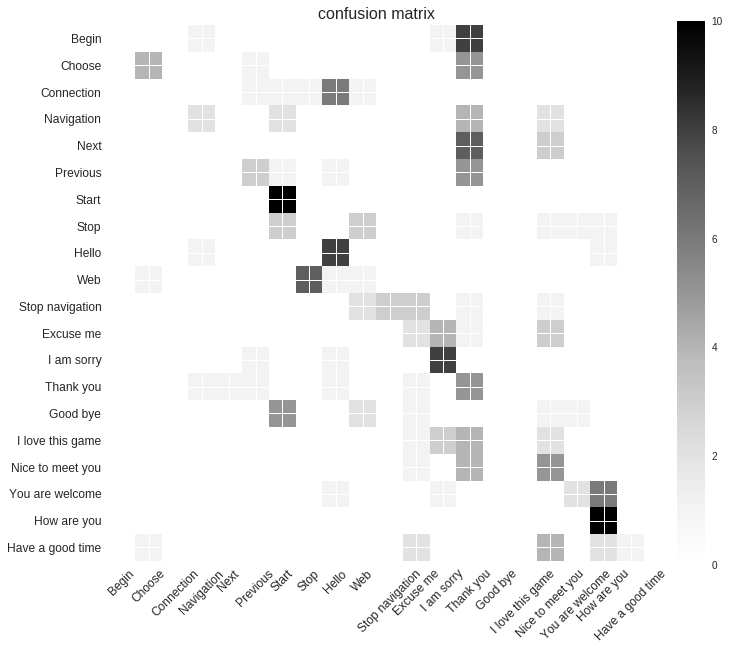

Test accuracy: 0.32


In [ ]:
y_classes=['Begin','Choose','Connection','Navigation','Next','Previous','Start','Stop','Hello','Web',"Stop navigation","Excuse me","I am sorry","Thank you","Good bye","I love this game","Nice to meet you","You are welcome","How are you","Have a good time"]
from sklearn.metrics import confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
plt.title('confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(Y_test_orig,y_pred_test_classes))
plt.xticks(np.arange(20),y_classes,rotation=45,fontsize=12)
plt.yticks(np.arange(20),y_classes,fontsize=12)
plt.colorbar()
plt.show()
print('Test accuracy:',accuracy_score(Y_test_orig,y_pred_test_classes))